In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
num_data = {
    'hsd': {
        'original': 13169,
        'undersampled': 3328,
        'oversampled': 14169
    },
    'netifier': {
        'original': 7773,
        'undersampled': 5798,
        'oversampled': 9800
    }
}

In [35]:
%pwd

'/Users/nicost/Documents/skripsi/multi-label-active-learning/experiments/final'

In [36]:
def average_results(results):
    return pd.concat(results).groupby(level=0).mean()

def load_result(dataset, type='overasmpled', ignored_method=['comal', 'random']):
    methods = ['lc', 'mc', 'kmeans', 'coreset', 'comal', 'besra', 'random']
    result = {}

    if ignored_method is not None:
        for method in ignored_method:
            methods.remove(method)
    
    for method in methods:
        if type == 'original':
            result[method] = [pd.read_csv(f"./{dataset}/metrics/{dataset}-{method}-1-results.csv")]
        else:
            for i in range(1):
                if i == 0:
                    result[method] = [pd.read_csv(f"./{dataset}/metrics/{type}/{dataset}-{type}-{method}-{i+1}-results.csv")]
                else:
                    result[method].append(pd.read_csv(f"./{dataset}/metrics/{type}/{dataset}-{type}-{method}-{i+1}-results.csv"))

    for method in methods:
        result[method] = average_results(result[method])
    
    # experiments/final/hsd/metrics/oversampled/hsd-oversampled-passive-results.csv
    if type == 'original':
        passive_result = pd.read_csv(f"./{dataset}/metrics/{dataset}-passive-results.csv")
    else:
        passive_result = pd.read_csv(f"./{dataset}/metrics/{type}/{dataset}-{type}-passive-results.csv")
    result['passive'] = pd.DataFrame({
        'Accuracy': [np.mean(passive_result['Accuracy']) for i in range(len(result['kmeans']))],
        'F1 Micro': [np.mean(passive_result['F1 Micro']) for i in range(len(result['kmeans']))],
        'F1 Macro': [np.mean(passive_result['F1 Macro']) for i in range(len(result['kmeans']))],
    })

    return result

In [37]:
def plot_results(dataset, metric='F1 Micro'):
    types = ['original', 'undersampled', 'oversampled']
    fig, axes = plt.subplots(3, 1, figsize=(15, 20))

    for i in range(3):
        ax = axes[i]
        result = load_result(dataset, types[i], ignored_method=[])
        data_used = [round(x / num_data[dataset][types[i]] * 100, 0) for x in result['kmeans']['Data Used']]

        for method in result.keys():
            if method != 'passive':
                ax.plot(data_used, result[method][metric], label=method.upper(), marker='o')
            elif metric != 'Sampling Duration':
                ax.plot(data_used, result[method][metric], label=method.upper(), linestyle='--', color='black')

        ax.set_title(f'{str(dataset).upper()} - {types[i].upper()}')
        ax.set_xlabel("Data Used (%)")
        ax.set_ylabel(metric)
        ax.legend(fontsize='x-large')
        ax.grid(True, axis='x')

        ax.set_xticks(data_used)

    plt.tight_layout()
    plt.show()

# HSD

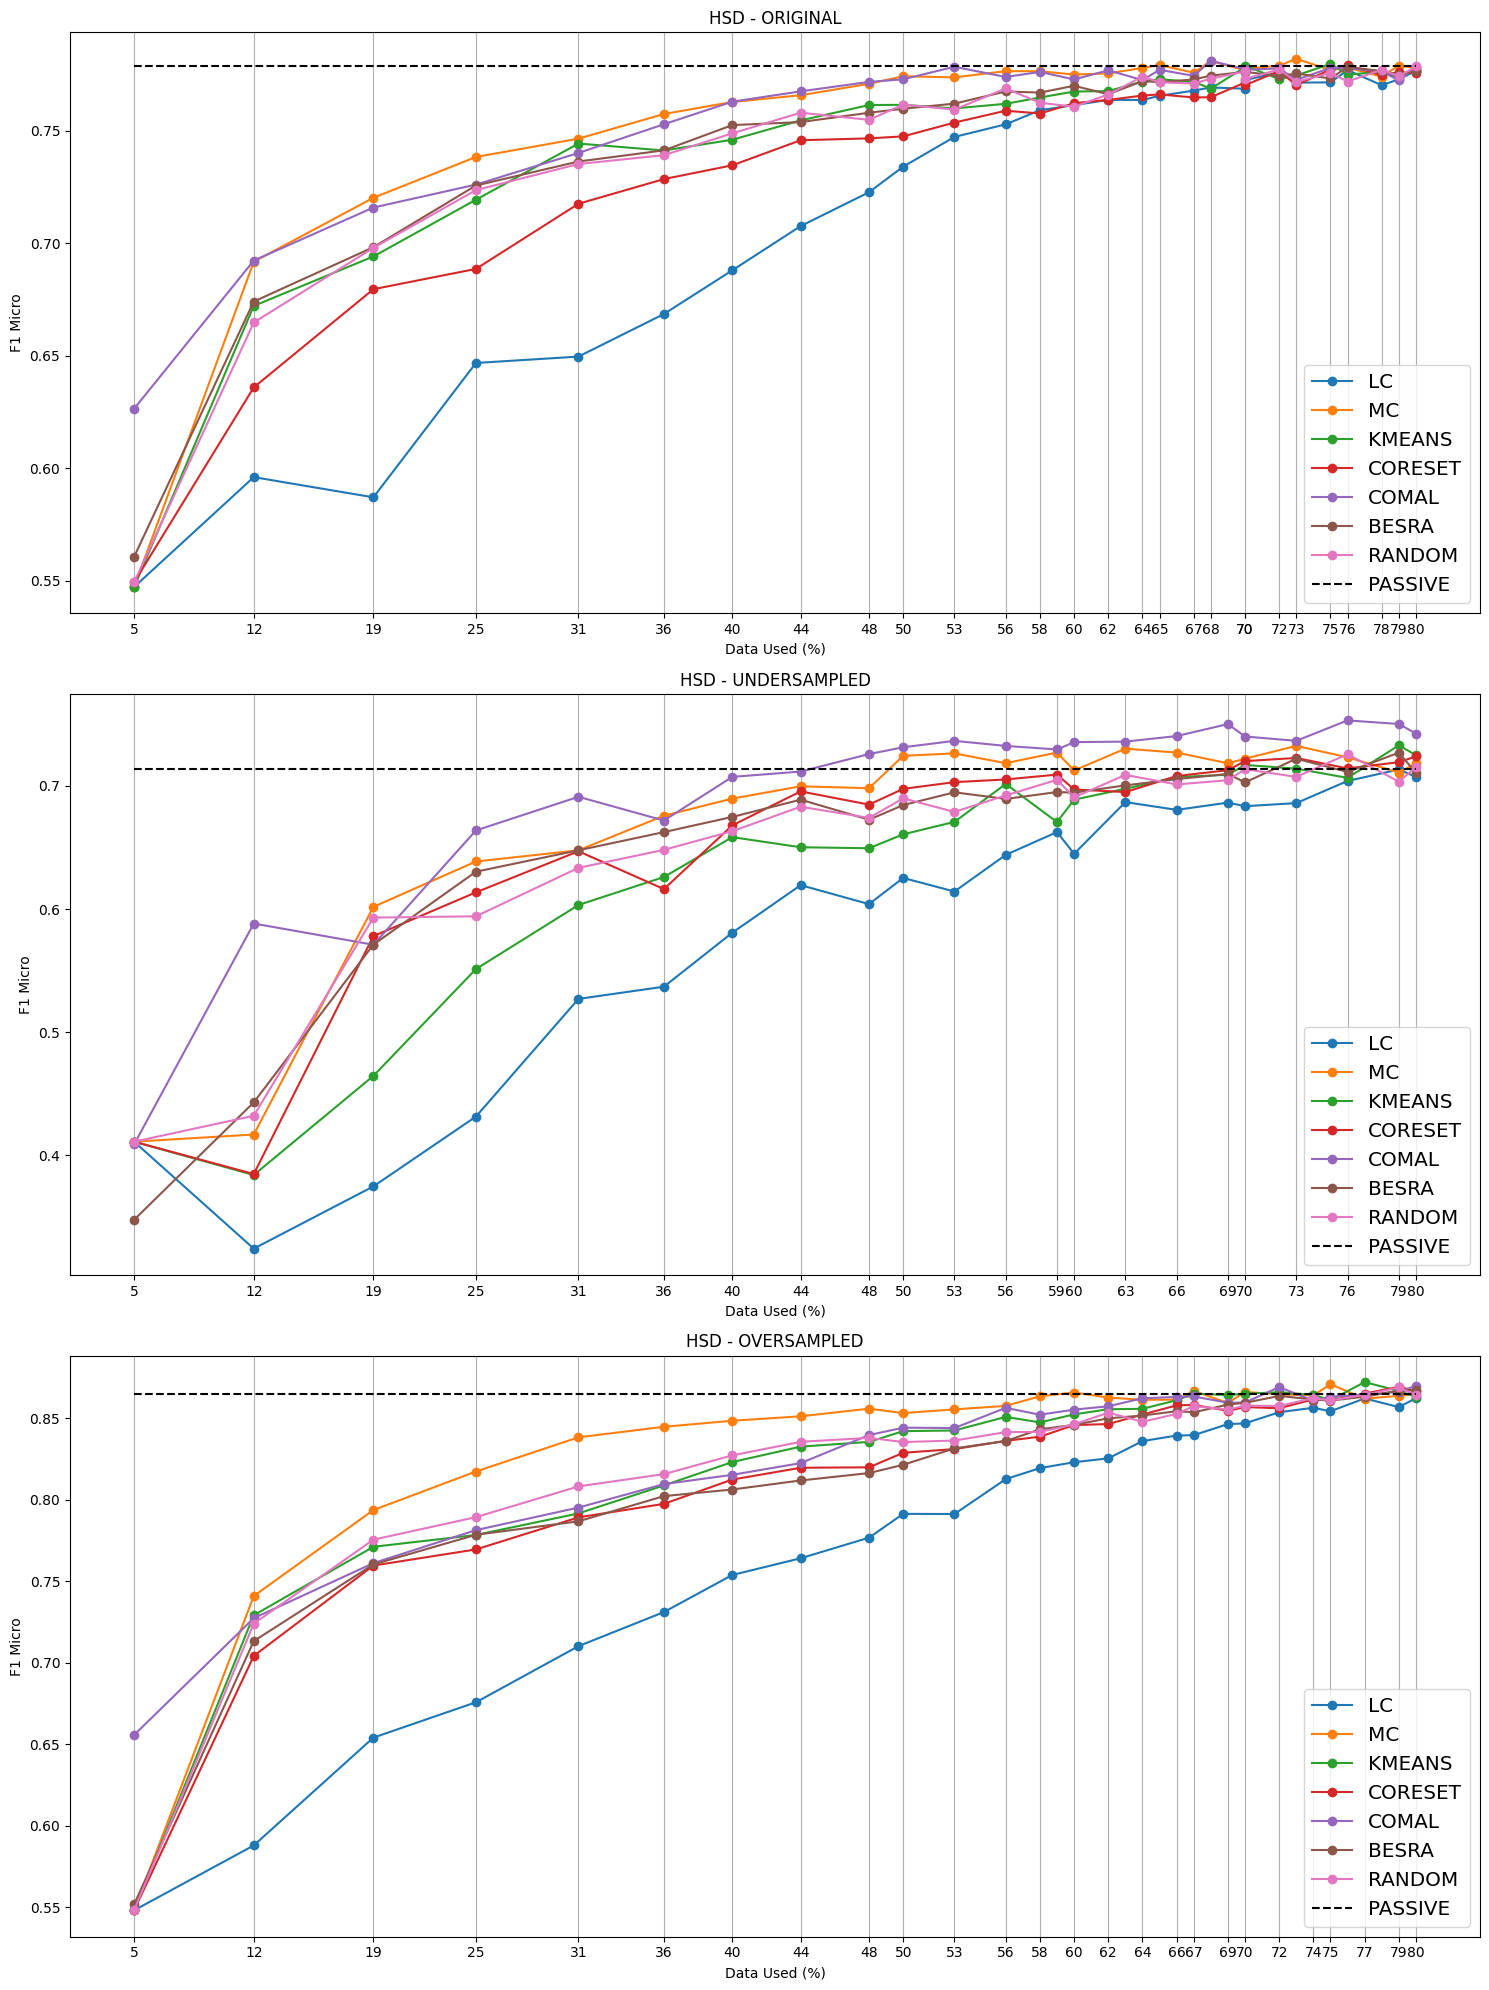

In [38]:
plot_results('hsd')

# NETIFIER

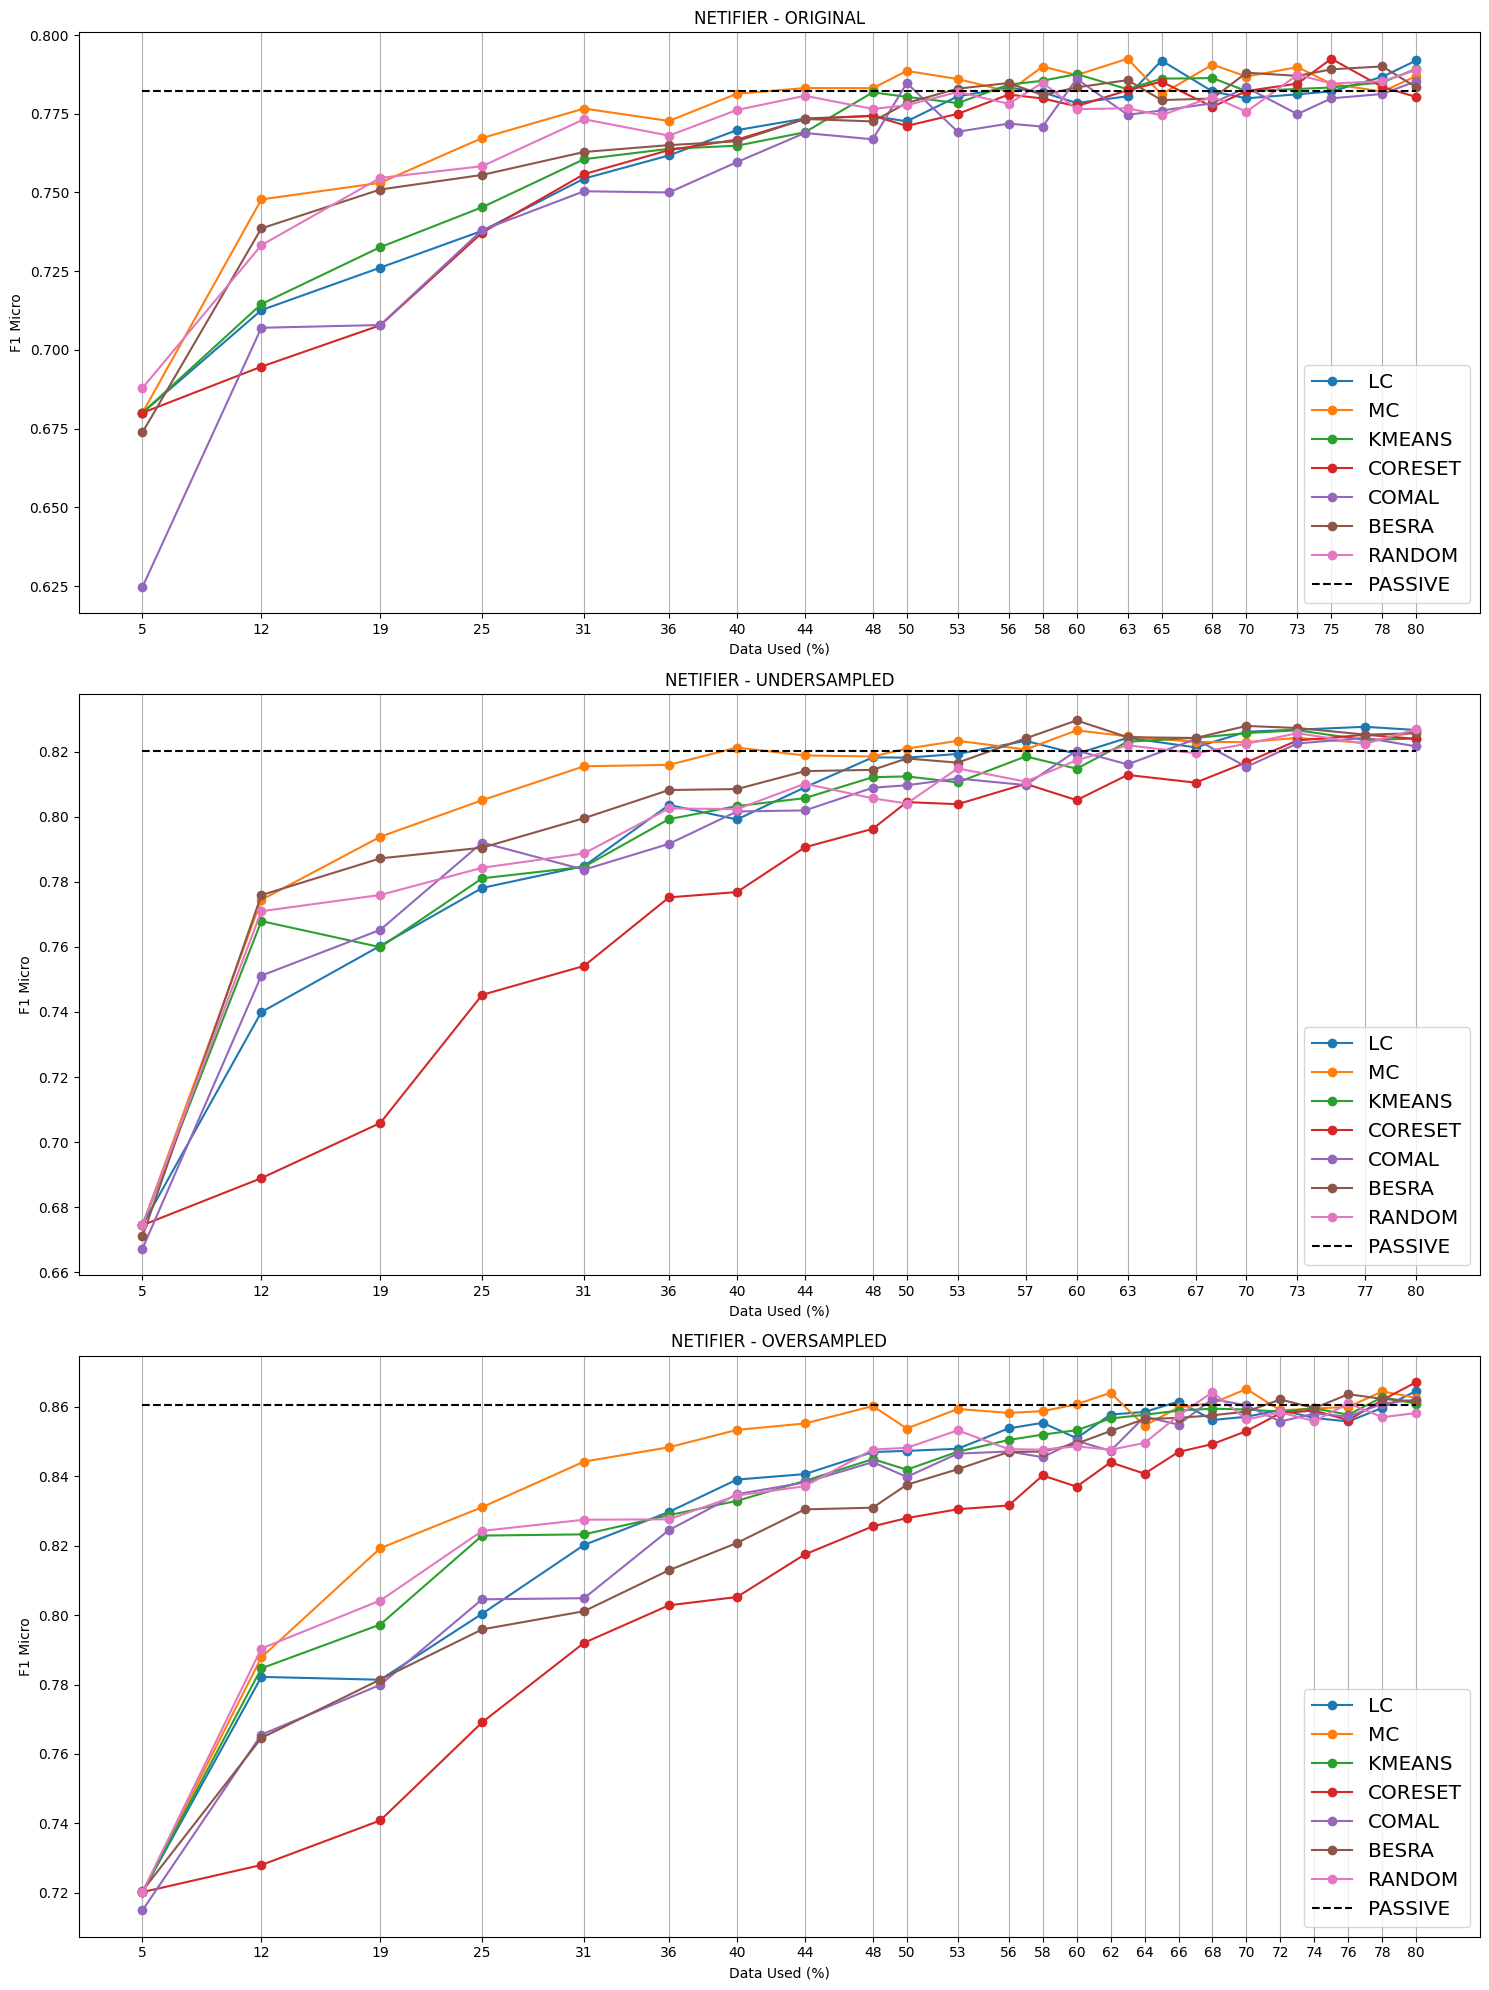

In [39]:
plot_results('netifier')